<a href="https://colab.research.google.com/github/varunraisinghal/CSE151A-MachineLearningFinalProject/blob/main/CSE151A_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Final Project

### Team Members

| Name    | Email Address      | Major                  | Pronouns |
|---------|--------------------|------------------------|----------|
| Amit    | anamburi@ucsd.edu  | Computer Science       | He/him   |
| Varun   | vsinghal@ucsd.edu  | Computer Science       | He/Him   |
| Eric    | e7tran@ucsd.edu    | Computer Science       | He/Him   |
| Brian   | bwlee@ucsd.edu     | ECE Computer Engineering | N/A    |
| Thomas  | tjoel@ucsd.edu     | Computer Science       | He/him   |
| Jason   | jsliang@ucsd.edu   | Computer Engineering   | He/him   |
| Desiree | dalcanta@ucsd.edu  | Computer Science       | She/her  |
| Tian   | xxxx@ucsd.edu    | Computer Science       | He/him   |


## Exploratory Data Analysis

# Exploratory Data Analysis: Spotify 2023 Dataset

The Spotify 2023 dataset contains information about tracks on Spotify for the year 2023, including various metrics and features that describe the musical and popularity characteristics of each track.

## Dataset Overview

- **Total Entries:** 953 tracks
- **Columns:** 24

### Key Columns

- `track_name`: The name of the track.
- `artist(s)_name`: The artist(s) name for the track.
- `artist_count`: The number of artists for each track.
- `released_year`, `released_month`, `released_day`: Release date information.
- `in_spotify_playlists`, `in_spotify_charts`, `streams`: Spotify-related metrics.
- `in_apple_playlists`, `in_apple_charts`, `in_deezer_playlists`, `in_deezer_charts`: Metrics related to other streaming platforms.
- `bpm`: Beats per minute, indicating the tempo of the track.
- `key`, `mode`: Musical key and mode of the track.
- Various metrics in percentages (`danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, `instrumentalness_%`, `liveness_%`, `speechiness_%`): Features representing the musical characteristics of each track.

### Observations

- Some columns have missing values (`in_shazam_charts`, `key`), which may require data imputation depending on the analysis or model building.
- The dataset contains a wide range of musical characteristics, indicating a diverse set of tracks.

## Analysis Steps

1. **Handling Missing Values:** Determine the best strategy for dealing with missing data (e.g., imputation, removal).
2. **Categorical Data Analysis:** Explore the distributions of categorical variables such as `artist(s)_name`, `key`, `mode`.
3. **Numerical Data Analysis:** Investigate the distributions of numerical features, identify any outliers, and understand the spread of data.
4. **Correlations:** Examine the relationships between numerical features, especially how different musical characteristics correlate with each other and with popularity metrics like streams and chart positions.
5. **Visualization:** Create various visualizations (histograms, scatter plots, box plots) to better understand the data distribution and the relationships between different variables.


Analysis of Spotify 2023 dataset provides insights into the musical and popularity dynamics of tracks on Spotify. This analysis can help identify trends, preferences, and the impact of various musical features on popularity metrics.


#### Imports

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#### Loading dataset


In [142]:
# download dataset
!wget https://raw.githubusercontent.com/varunraisinghal/CSE151A-MachineLearningFinalProject/main/spotify-2023.csv

# read in dataset
spotify_data = pd.read_csv('spotify-2023.csv', encoding = 'latin1')

# look at the dataframe
spotify_data

'wget' is not recognized as an internal or external command,
operable program or batch file.


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [143]:
# look at the datatypes
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Ideally the datatypes should be either of object type (strings like artist names, etc.) or int64 (numbers). \
Attributes should be int64 like `in_deezer_playlists` likely have messily typed numbers, so we need to fix those.

#### Pre Processing Data

In [144]:
# check which attributes have null values
missing_values = spotify_data.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [145]:
# impute shazam charts as 0 if null (meaning 0 streams in shazam charts)
spotify_data['in_shazam_charts'].fillna(value = 0, inplace = True)

# dropping key and mode for now as it doesn't help that much
spotify_data.drop(['key', 'mode'], axis = 1, inplace = True)

In [146]:
# attempt a conversion of the streams column to int64, see if there is an error
try:
    spotify_data['streams'] = spotify_data['streams'].astype(np.int64)
except Exception as error:
    print(error)

# remove the faulty row
spotify_data.drop(spotify_data[spotify_data['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index, inplace = True)

# retry the conversion
try:
    spotify_data['streams'] = spotify_data['streams'].astype(np.int64)
except Exception as error:
    print(error)

invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'


In [147]:
spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [148]:
spotify_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [149]:
# min-max normalization
mmScaler = MinMaxScaler()

mmScaler.fit_transform(spotify_data[['danceability_%']])

array([[0.78082192],
       [0.65753425],
       [0.38356164],
       [0.43835616],
       [0.57534247],
       [0.94520548],
       [0.60273973],
       [0.60273973],
       [0.84931507],
       [0.79452055],
       [0.46575342],
       [0.75342466],
       [0.65753425],
       [0.38356164],
       [0.39726027],
       [0.56164384],
       [0.75342466],
       [0.28767123],
       [0.8630137 ],
       [0.54794521],
       [0.57534247],
       [0.63013699],
       [0.34246575],
       [0.84931507],
       [0.84931507],
       [0.76712329],
       [0.78082192],
       [0.79452055],
       [0.39726027],
       [0.60273973],
       [0.69863014],
       [0.45205479],
       [0.65753425],
       [0.56164384],
       [0.67123288],
       [0.79452055],
       [0.52054795],
       [0.71232877],
       [0.50684932],
       [0.76712329],
       [0.45205479],
       [0.7260274 ],
       [0.45205479],
       [0.45205479],
       [0.73972603],
       [0.60273973],
       [0.65753425],
       [0.493

In [150]:
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,826,125,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,382,92,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,949,138,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,548,170,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,0,144,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,0,166,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,0,92,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,0,97,82,67,77,8,0,12,5


#### Histograms Distribution Pattern

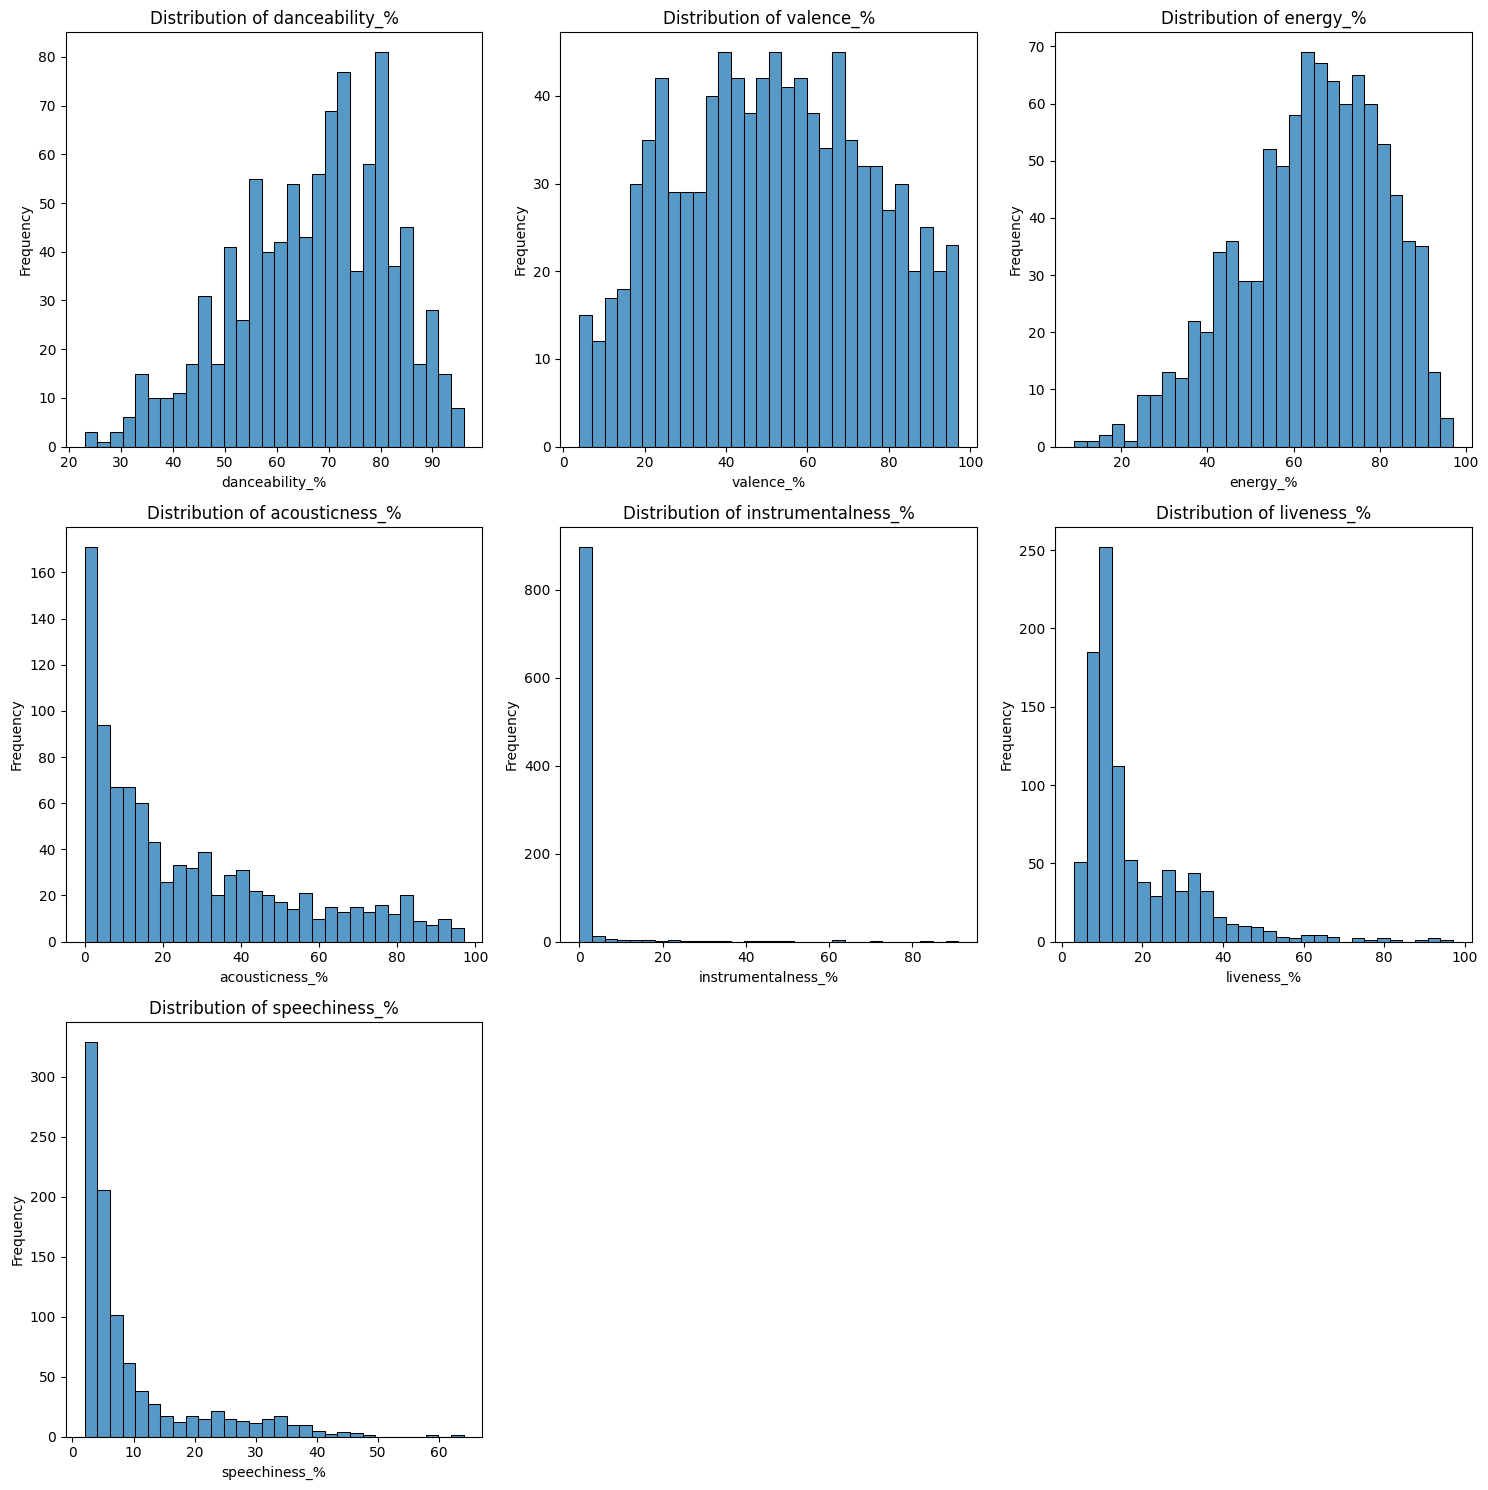

In [151]:
features = [
    'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(spotify_data[feature], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for ax in axes[len(features):]:
    fig.delaxes(ax)


plt.tight_layout()
plt.show()


#### Heatmap

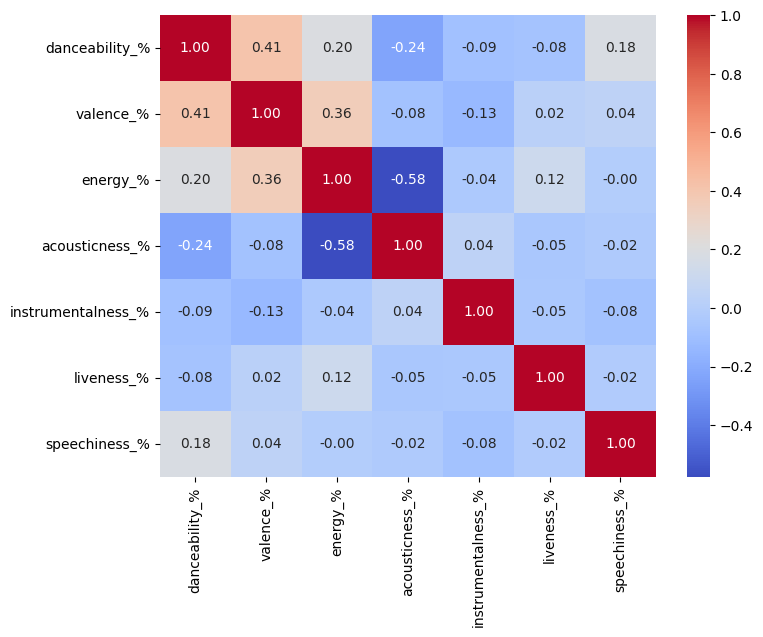

In [152]:
corr = spotify_data[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

#### Pairplot

In [153]:
sns.pairplot(spotify_data[features])
plt.show()